In [18]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [19]:
os.getcwd()

'/Users/shivaramakrishna/sc-analysis-hlca/visium'

In [20]:
adata = sc.read_visium('/Users/shivaramakrishna/sc-analysis-hlca/visium')
adata.var_names_make_unique("var")
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [21]:
adata.var_names_make_unique()

In [22]:
adata

AnnData object with n_obs × n_vars = 3858 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [23]:

adata.obs


,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AACACGTGCATCGCAC-1,1,76,22,132,4.890349,156.0,5.056246,47.435897,79.487179,100.000000,100.000000,6.0,1.945910,3.846154
AACACTTGGCAAGGAA-1,1,47,71,7566,8.931552,20536.0,9.929983,6.822166,10.532723,16.044994,27.624659,266.0,5.587249,1.295286
AACAGGATTCATAGTT-1,1,49,43,5993,8.698514,12740.0,9.452580,13.281005,17.425432,22.927786,34.113030,129.0,4.867535,1.012559
AACAGGTTATTGCACC-1,1,28,86,5703,8.648923,11680.0,9.365719,10.299658,14.023973,19.777397,31.892123,511.0,6.238325,4.375000
AACAGGTTCACCGAAG-1,1,51,41,3585,8.184793,6137.0,8.722254,21.704416,25.664005,31.285644,42.757047,114.0,4.744932,1.857585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTGGAACCTTCCGC-1,1,35,35,6626,8.798907,15437.0,9.644588,8.414847,12.334003,18.047548,29.941051,218.0,5.389072,1.412192
TGTTGGAACGAGGTCA-1,1,28,72,9523,9.161570,44484.0,10.702908,8.133261,11.903156,17.185955,28.398975,999.0,6.907755,2.245751
TGTTGGAAGCTCGGTA-1,1,1,95,3430,8.140607,5021.0,8.521584,10.495917,14.917347,21.250747,34.773949,114.0,4.744932,2.270464
TGTTGGATGGACTTCT-1,1,13,53,6913,8.841304,19076.0,9.856238,9.131893,13.309918,19.479975,31.573705,205.0,5.327876,1.074649


In [24]:
adata.var

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
SAMD11,ENSG00000187634,Gene Expression,GRCh38,False,341,0.098237,0.093707,91.161223,379.0,5.940171
NOC2L,ENSG00000188976,Gene Expression,GRCh38,False,1887,0.919388,0.652007,51.088647,3547.0,8.174139
KLHL17,ENSG00000187961,Gene Expression,GRCh38,False,726,0.218766,0.197839,81.181960,844.0,6.739336
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38,False,768,0.244686,0.218884,80.093313,944.0,6.851185
PERM1,ENSG00000187642,Gene Expression,GRCh38,False,144,0.038621,0.037894,96.267496,149.0,5.010635
...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,3835,68.939865,4.247636,0.596164,265970.0,12.491142
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,3835,57.187145,4.063664,0.596164,220628.0,12.304237
MT-ND5,ENSG00000198786,Gene Expression,GRCh38,True,3805,13.777864,2.693130,1.373769,53155.0,10.880986
MT-ND6,ENSG00000198695,Gene Expression,GRCh38,True,3809,23.562468,3.201220,1.270088,90904.0,11.417570


<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

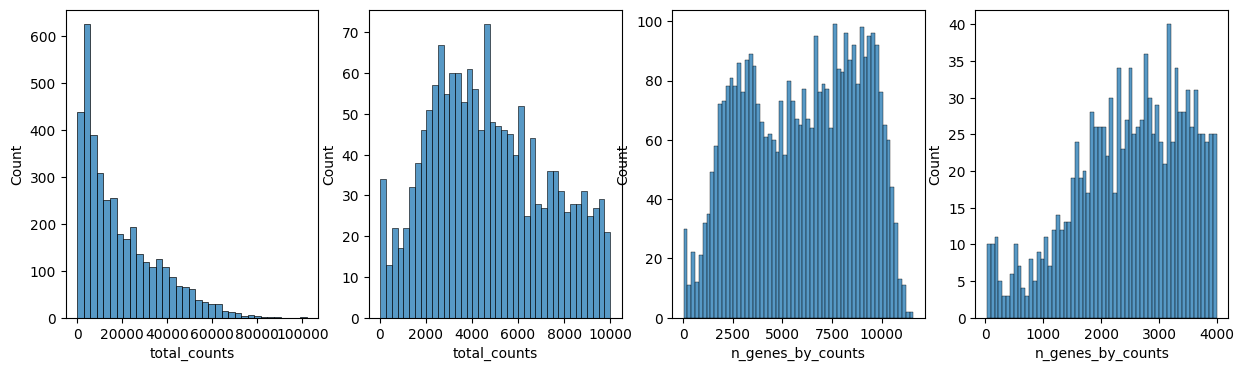

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [26]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

#cells after MT filter: 2257


In [27]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [28]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters", directed=False, n_iterations=-1)


/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


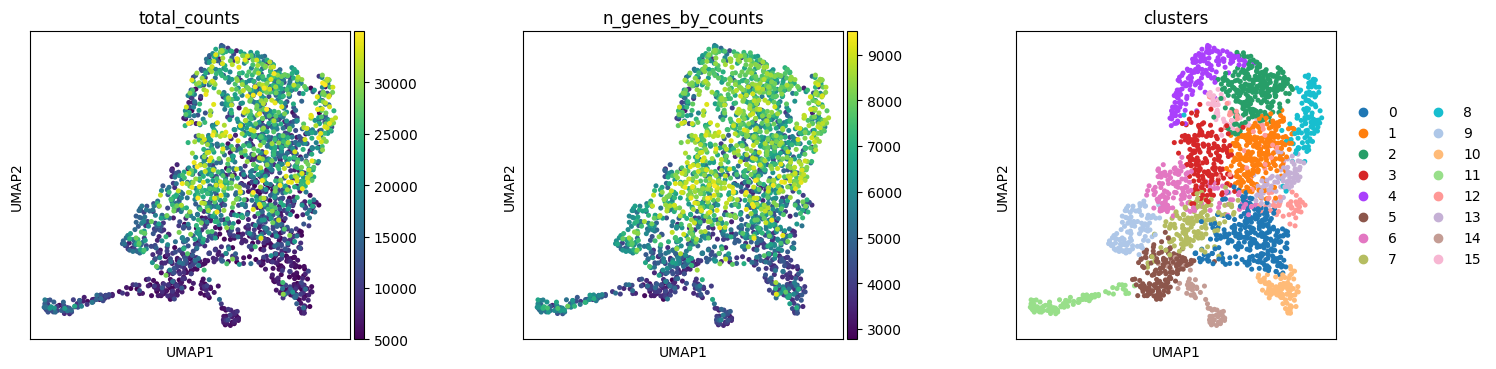

In [29]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

TypeError: can't multiply sequence by non-int of type 'float'

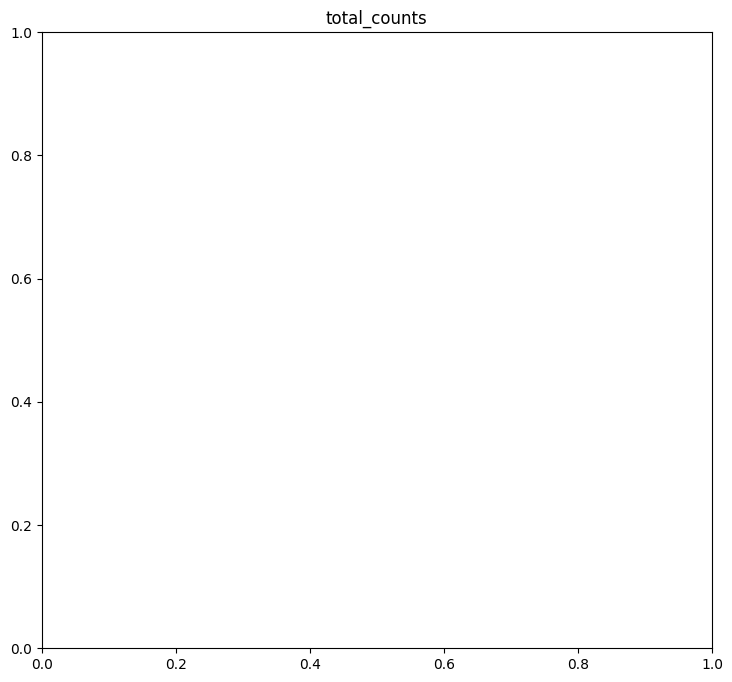

In [32]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires",color=["total_counts", "n_genes_by_counts"])
#adata.uns

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


TypeError: can't multiply sequence by non-int of type 'float'

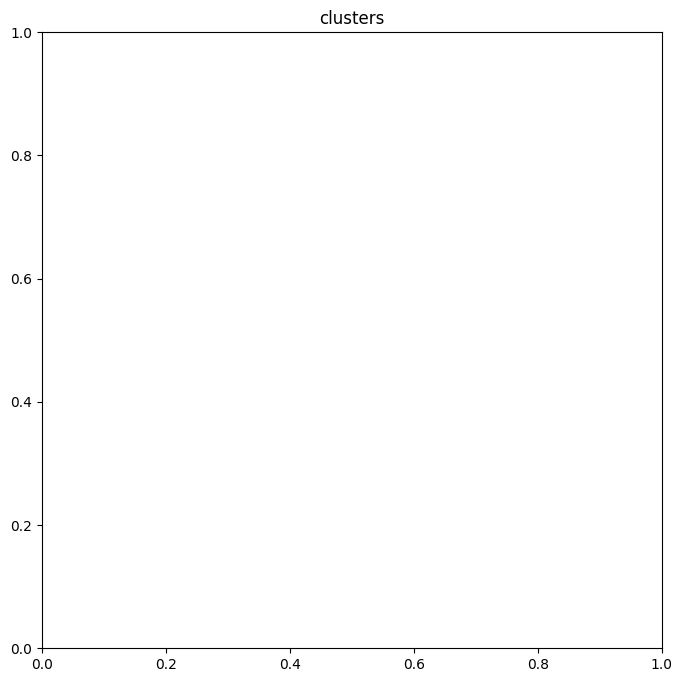

In [31]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)


categories: 0, 1, 2, etc.
var_group_labels: 1


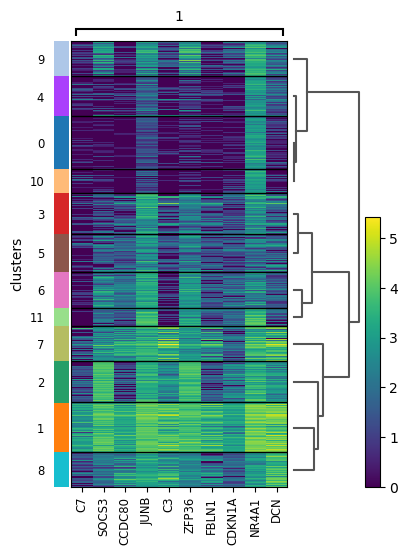

In [177]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="1", n_genes=10, groupby="clusters")

In [161]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama
import squidpy as sq

from pathlib import Path

In [183]:
# load the pre-processed dataset
img = "BENG207/sc-analysis-hlca/sclc/spatial/cytassist_image.tiff"
img 
img = sq.im.ImageContainer("BENG207/sc-analysis-hlca/sclc/spatial/cytassist_image.tiff")
print(img)
print(adata.obsm["spatial"])
print(img.shape)  # Assuming 'img' is your image object
img.compute()

ImageContainer[shape=(11757, 11291), layers=['image']]
[[18375  3413]
 [27664  6345]
 [20370  5013]
 ...
 [28006  8876]
 [13742 10641]
 [29444 11417]]
(11757, 11291)


ImageContainer[shape=(11757, 11291), layers=['image']]

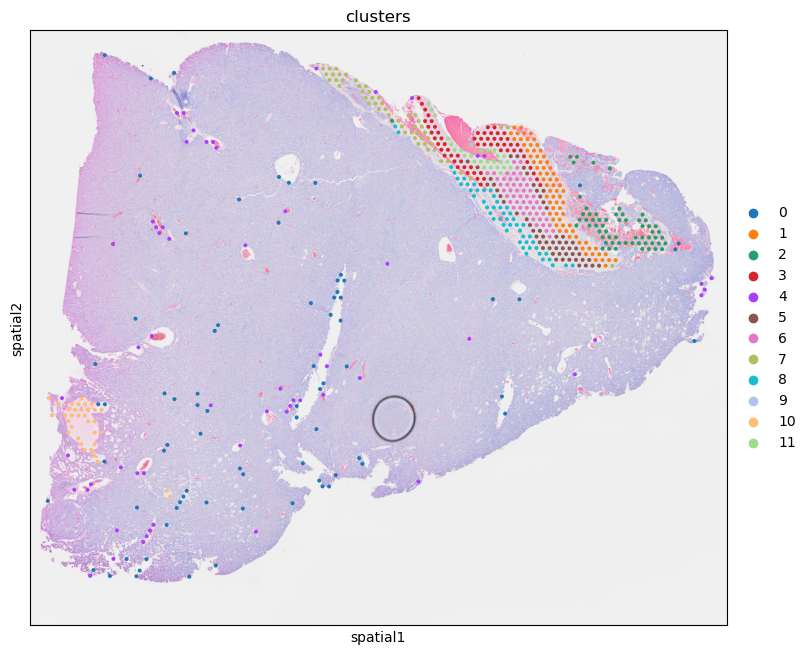

In [184]:
sq.pl.spatial_scatter(adata, color="clusters")

In [193]:
print(adata.uns)
scale = adata.uns['spatial']['CytAssist_11mm_FFPE_Human_Lung_Cancer']['scalefactors']['tissue_hires_scalef']
scale = 0.15580368

OrderedDict([('spatial', {'CytAssist_11mm_FFPE_Human_Lung_Cancer': {'images': {'hires': array([[[0.9411765 , 0.94509804, 0.9490196 ],
        [0.94509804, 0.94509804, 0.9490196 ],
        [0.94509804, 0.94509804, 0.9490196 ],
        ...,
        [0.9411765 , 0.9411765 , 0.9490196 ],
        [0.9411765 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.9411765 , 0.94509804]],

       [[0.9411765 , 0.94509804, 0.9490196 ],
        [0.94509804, 0.94509804, 0.9490196 ],
        [0.94509804, 0.94509804, 0.94509804],
        ...,
        [0.9411765 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.94509804, 0.94509804],
        [0.9411765 , 0.9411765 , 0.9490196 ]],

       [[0.9411765 , 0.94509804, 0.9490196 ],
        [0.9411765 , 0.94509804, 0.94509804],
        [0.94509804, 0.94509804, 0.9490196 ],
        ...,
        [0.9411765 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.9411765 , 0.94509804]],

       ...,

       [[0.9411765 , 0.945

In [196]:
sq.im.calculate_image_features(
    adata, img, features="summary", key_added="features", show_progress_bar=False, scale=scale
)


ValueError: Expected `width` to be in interval `[0, 11291]`, found `18375`.

In [186]:
# calculate features for different scales (higher value means more context)

feature_name = f"features_summary_scale{scale}"
sq.im.calculate_image_features(
        adata,
        img.compute(),
        features="summary",
        key_added=feature_name,
        n_jobs=4,
        scale=scale,
    )

  0%|          | 0/644 [00:00<?, ?/s]

ValueError: Expected `width` to be in interval `[0, 11291]`, found `18375`.